Enter Name : kane
ID for Kane Williamson (New Zealand) : 277906

Kane Williamson's ODI Career Analysis
First match: August 10, 2010
Last match: October 13, 2023
Number of matches played: 162
Number of innings played: 154
Not outs: 17
Runs scored in career: 6632
Balls faced in career: 8201
Career strike rate: 80.87
Career average: 48.41
Highest score in career: 148
Number of 100s: 13
Number of 50s: 43
Number of 4s: 602
Number of 6s: 52

Kane Williamson's World Cup Stats
Matches played : 24
Innings played : 23
Not outs : 7
Runs scored : 989
Balls faced : 1270
Strike rate: 77.87
Average: 61.81
Highest score : 148
Number of 100s : 2
Number of 50s : 4

Bowlers with Most Dismissal against Kane Williamson
+----+------------------+-----------+-------------+-----------+
|    | Bowler           |   Matches |   Dismissed |   Average |
|----+------------------+-----------+-------------+-----------|
|  2 | LL Tsotsobe (SA) |         6 |           4 |     19.75 |
|  1 | Imran Tahir (SA) |        11 

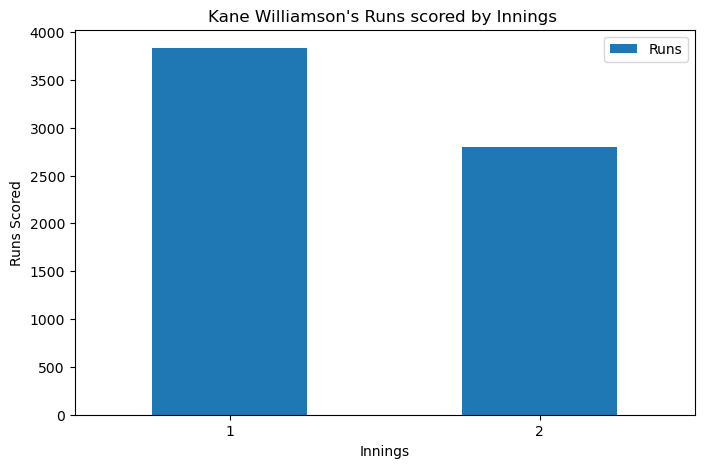

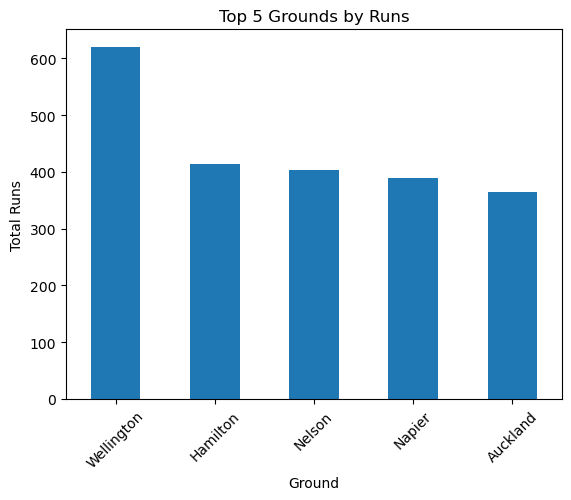

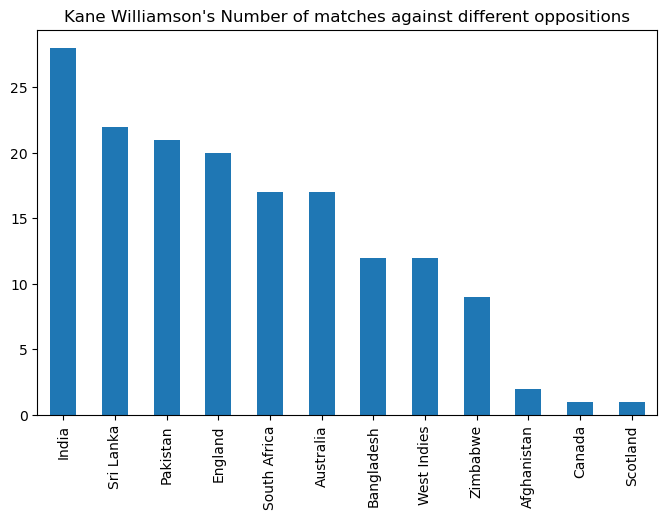

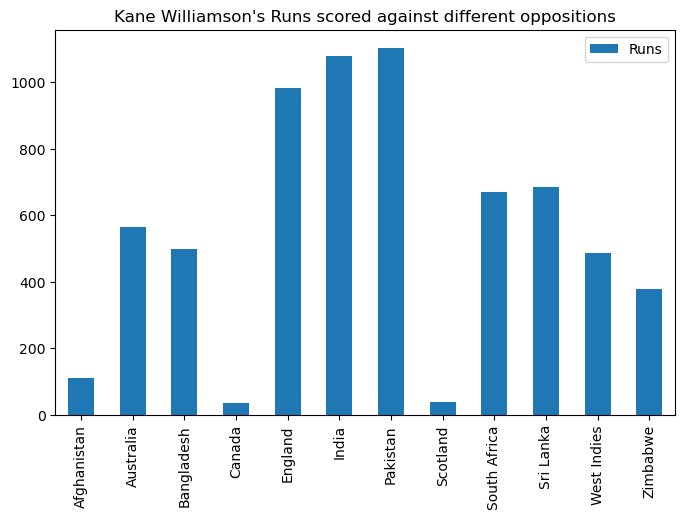

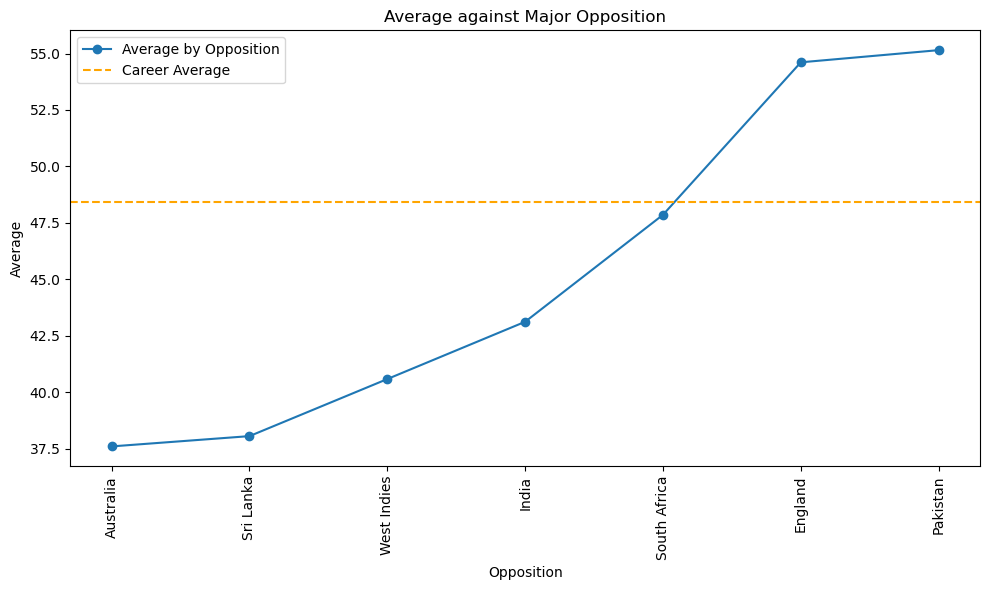

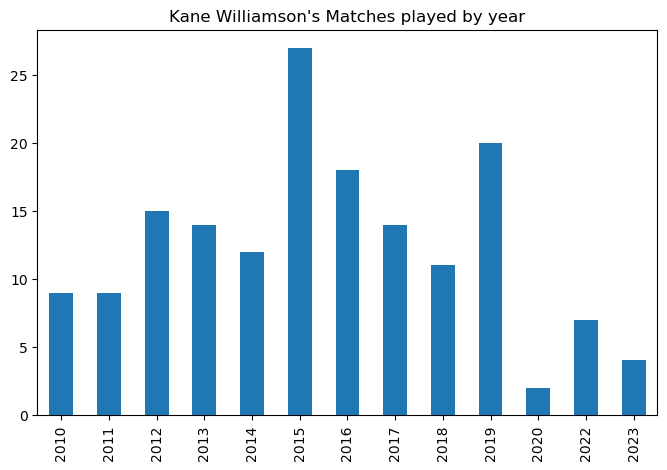

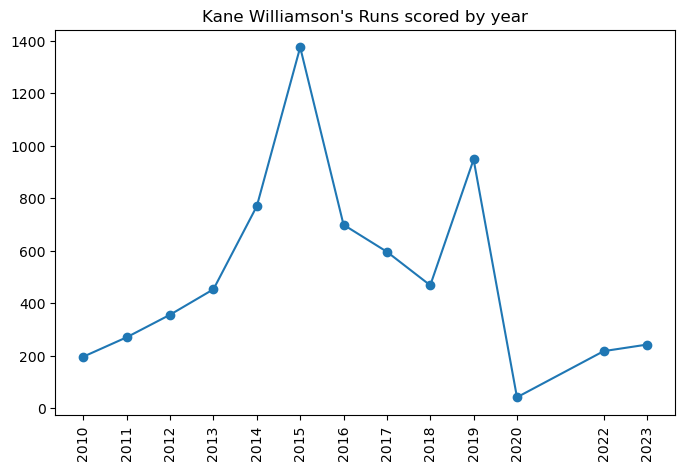

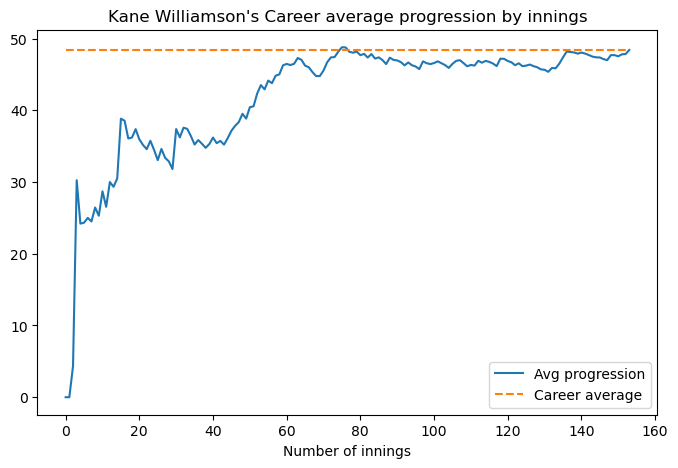

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import re
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

def bold_text(text):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    return bold_start + text + bold_end

final = pd.read_csv('Final_Data.csv')
final.head()
n = input("Enter Name : ")

res = final[final.NAME.str.contains(n,flags=re.IGNORECASE)].sort_values('BATTING_ODIs_Mat',ascending = False)

if not res.empty:
    res = final[final.NAME.str.contains(n,flags=re.IGNORECASE)].sort_values('BATTING_ODIs_Mat',ascending = False)
    res = res.values[0]
    n = res[1]
    result = final[final.NAME.str.contains(n,flags=re.IGNORECASE)].values[0]
    result = res[0]
    cty = res[2]
    n = res[1]
    
    print(f'ID for {n} ({cty}) : {result}')
    
    result = str(result)
    url = 'https://stats.espncricinfo.com/ci/engine/player/' + result + '.html?class=2;template=results;type=batting;view=match'
    response = requests.get(url)
    html=requests.get(url,timeout=10,verify=True)    
    dfs=pd.read_html(html.text)
    print(bold_text(f"\n{n}'s ODI Career Analysis"))  
    df=dfs[3]
    
    if len(df.columns)==11:       
        url1 = 'https://stats.espncricinfo.com/ci/engine/player/'+ result +'.html?class=2;template=results;type=batting;view=innings'
        response1 = requests.get(url1)
        html1=requests.get(url1,timeout=10,verify=True)
        dfs=pd.read_html(html1.text)
        df1=dfs[3]      
        df1['Inns']
        df["Inns"] = df1['Inns']
        
        df.rename(columns={"Unnamed: 10": "odi_number"}, inplace=True)
        df = df[['Bat1','Runs','Inns','BF','SR','4s','6s','Opposition','Ground','Start Date','odi_number']]
        df['Start Date']= pd.to_datetime(df['Start Date'])
        df.rename(columns={"Start Date": "Date"}, inplace=True)
        df['Opposition'] = df['Opposition'].apply(lambda x: x[2:])
        df['year'] = df['Date'].dt.year.astype(int)
        df['Bat1'] = df['Bat1'].apply(str)
        df['not_out'] = np.where(df['Bat1'].str.endswith('*'), 1, 0)
        # dropping the odi_number feature because it adds no value to the analysis
        df['ODI_Number'] = df['odi_number'].str.extract(r'# (\d+)').astype(int)
        df.drop(columns='odi_number', inplace=True)
        df_new = df.loc[((df['Bat1'] != 'DNB') & (df['Bat1'] != 'TDNB') & (df['Bat1'] != 'sub') & (df['SR'] != '-')), 'Bat1':]
        df_new['Runs'] = df_new['Runs'].astype(int)
        df_new['BF'] = df_new['BF'].astype(int)
        df_new['SR'] = df_new['SR'].astype(float)
        df_new['4s'] = df_new['4s'].astype(int)
        df_new['6s'] = df_new['6s'].astype(int)
        df_new['Inns'] = df_new['Inns'].astype(int)
        df['ODI_Number'] = df['ODI_Number'].astype(int)
        first_match_date = df['Date'].dt.date.min().strftime('%B %d, %Y') # first match
        print('First match:', first_match_date)
        last_match_date = df['Date'].dt.date.max().strftime('%B %d, %Y') # last match
        print('Last match:', last_match_date)
        number_of_matches = df.shape[0] # number of matches played in career
        print('Number of matches played:', number_of_matches)
        number_of_inns = df_new.shape[0] # number of innings
        print('Number of innings played:', number_of_inns)
        not_outs = df_new['not_out'].sum() # number of not outs in career
        print('Not outs:', not_outs)
        runs_scored = df_new['Runs'].sum() # runs scored in career
        print('Runs scored in career:', runs_scored)
        balls_faced = df_new['BF'].sum() # balls faced in career
        print('Balls faced in career:', balls_faced)
        career_sr = (runs_scored / balls_faced)*100 # career strike rate
        print('Career strike rate: {:.2f}'.format(career_sr))
        career_avg = (runs_scored / (number_of_inns - not_outs)) # career average
        print('Career average: {:.2f}'.format(career_avg))
        highest_score_date = df_new.loc[df_new.Runs == df_new.Runs.max(), 'Date'].values[0]
        highest_score = df.loc[df.Date == highest_score_date, 'Bat1'].values[0] # highest score
        print('Highest score in career:', highest_score)
        hundreds = df_new.loc[df_new['Runs'] >= 100].shape[0] # number of 100s
        print('Number of 100s:', hundreds)
        fifties = df_new.loc[(df_new['Runs']>=50)&(df_new['Runs']<100)].shape[0] #number of 50s
        print('Number of 50s:', fifties)
        fours = df_new['4s'].sum() # number of fours in career
        print('Number of 4s:', fours)
        sixes = df_new['6s'].sum() # number of sixes in career
        print('Number of 6s:', sixes)
        
        ranges = [(19, 33), (61, 74), (197, 223), (451, 477), (714, 752),
          (1048, 1083), (1443, 1484), (1942, 1993), (2531, 2581),
          (3100, 3148), (3599, 3646), (4143, 4192), (4658, 4699)]

        selected_rows = df[df['ODI_Number'].between(*ranges[0]) | 
                           df['ODI_Number'].between(*ranges[1]) | 
                           df['ODI_Number'].between(*ranges[2]) | 
                           df['ODI_Number'].between(*ranges[3]) | 
                           df['ODI_Number'].between(*ranges[4]) | 
                           df['ODI_Number'].between(*ranges[5]) | 
                           df['ODI_Number'].between(*ranges[6]) | 
                           df['ODI_Number'].between(*ranges[7]) | 
                           df['ODI_Number'].between(*ranges[8]) | 
                           df['ODI_Number'].between(*ranges[9]) | 
                           df['ODI_Number'].between(*ranges[10]) | 
                           df['ODI_Number'].between(*ranges[11]) | 
                           df['ODI_Number'].between(*ranges[12])]

        df_worldcup = pd.DataFrame(selected_rows)

        wnumber_of_matches = df_worldcup.shape[0] # number of matches played in career
        if wnumber_of_matches==0:
            print(bold_text("\nNo World Cup Matches"))
        else:
            df_worldcup = df_worldcup.loc[((df_worldcup['Bat1'] != 'DNB') & (df_worldcup['Bat1'] != 'TDNB') & (df_worldcup['Bat1'] != 'sub') & (df_worldcup['SR'] != '-')), 'Bat1':]

            print(bold_text(f"\n{n}'s World Cup Stats"))
            df_worldcup['Runs'] = df_worldcup['Runs'].astype(int)
            df_worldcup['BF'] = df_worldcup['BF'].astype(int)
            print('Matches played :', wnumber_of_matches)
            wnumber_of_inns = df_worldcup.shape[0] # number of innings
            print('Innings played :', wnumber_of_inns)
            wnot_outs = df_worldcup['not_out'].sum() # number of not outs in career
            print('Not outs :', wnot_outs)
            wruns_scored = df_worldcup['Runs'].sum() # runs scored in career
            print('Runs scored :', wruns_scored)
            wballs_faced = df_worldcup['BF'].sum() # balls faced in career
            print('Balls faced :', wballs_faced)
            wcareer_sr = (wruns_scored / wballs_faced)*100 # career strike rate
            print('Strike rate: {:.2f}'.format(wcareer_sr))
            wcareer_avg = (wruns_scored / (wnumber_of_inns - wnot_outs)) # career average
            print('Average: {:.2f}'.format(wcareer_avg))
            whighest_score_date = df_worldcup.loc[df_worldcup.Runs == df_worldcup.Runs.max(), 'Date'].values[0]
            whighest_score = df_worldcup.loc[df_worldcup.Date == whighest_score_date, 'Bat1'].values[0] # highest score
            print('Highest score :', whighest_score)
            whundreds = df_worldcup.loc[df_worldcup['Runs'] >= 100].shape[0] # number of 100s
            print('Number of 100s :', whundreds)
            wfifties = df_worldcup.loc[(df_worldcup['Runs']>=50)&(df_worldcup['Runs']<100)].shape[0] #number of 50s
            print('Number of 50s :', wfifties)

        urlb = 'https://stats.espncricinfo.com/ci/engine/player/' + result + '.html?class=2;template=results;type=batting;view=bowler_summary'
        responseb = requests.get(urlb)
        htmlb = requests.get(urlb,timeout=10,verify=True)
        dfsb =pd.read_html(htmlb.text)
        dfb=dfsb[3]
        dfb = dfb[['Bowler','Mat','Dis','Ave']]
        dfb.rename(columns={"Mat": "Matches"}, inplace=True)
        dfb.rename(columns={"Dis": "Dismissed"}, inplace=True)
        dfb.rename(columns={"Ave": "Average"}, inplace=True)
        print(bold_text(f'\nBowlers with Most Dismissal against {n}'))
        dfb = dfb.sort_values(by=['Dismissed', 'Average'], ascending=[False, True])
        print(tabulate(dfb.head(),headers=dfb.columns, tablefmt = 'psql'))

        runs_scored_by_innings = pd.DataFrame(df_new.groupby('Inns')['Runs'].sum())
        runs_scored_by_innings.plot(kind='bar', title=f"{n}'s Runs scored by Innings ", figsize=(8, 5))
        plt.xlabel("Innings");
        plt.ylabel('Runs Scored')
        plt.xticks(rotation=0)
        plt.show()
        
        ground_runs = df_new.groupby('Ground')['Runs'].sum()
        top5_ground_runs = ground_runs.nlargest(5)
        top5_ground_runs.plot(kind='bar')
        plt.title('Top 5 Grounds by Runs')
        plt.xlabel('Ground')
        plt.ylabel('Total Runs')
        plt.xticks(rotation=45)
        plt.show()
        
        #2
        df['Opposition'].value_counts().plot(kind='bar', title=f"{n}'s Number of matches against different oppositions", figsize=(8, 5));
        plt.show();

        #3
        runs_scored_by_opposition = pd.DataFrame(df_new.groupby('Opposition')['Runs'].sum())
        runs_scored_by_opposition.plot(kind='bar', title=f"{n}'s Runs scored against different oppositions", figsize=(8, 5))
        plt.xlabel(None)
        plt.show();

        #4
        mdf = df_new.loc[(df_new['Opposition']=='Australia') |(df_new['Opposition']=='India') |
        (df_new['Opposition']=='South Africa') |(df_new['Opposition']=='Pakistan') |
        (df_new['Opposition']=='England') |(df_new['Opposition']=='New Zealand') |
        (df_new['Opposition']=='Sri Lanka') |(df_new['Opposition']=='Australia') |
        (df_new['Opposition']=='West Indies')]

        innings_by_opposition = pd.DataFrame(mdf.groupby('Opposition')['Date'].count())
        not_outs_by_opposition = pd.DataFrame(mdf.groupby('Opposition')['not_out'].sum())
        temp = runs_scored_by_opposition.merge(innings_by_opposition, left_index=True, right_index=True)
        average_by_opposition = temp.merge(not_outs_by_opposition, left_index=True, right_index=True)
        average_by_opposition.rename(columns = {'Date': 'innings'}, inplace=True)
        average_by_opposition['eff_num_of_inns'] = average_by_opposition['innings'] - average_by_opposition['not_out']
        average_by_opposition['average'] = average_by_opposition['Runs'] / average_by_opposition['eff_num_of_inns']
        average_by_opposition.replace(np.inf, np.nan, inplace=True)

        # Sort the DataFrame by 'average' column for better visualization
        average_by_opposition = average_by_opposition.sort_values(by='average')
        # Create a line chart
        plt.figure(figsize=(10, 6))
        plt.plot(average_by_opposition.index, average_by_opposition['average'], marker='o', linestyle='-', label='Average by Opposition')
        plt.axhline(y=career_avg, color='orange', linestyle='--', label='Career Average')
        # Add labels and title
        plt.xlabel('Opposition')
        plt.ylabel('Average')
        plt.title('Average against Major Opposition')
        # Rotate the x-axis labels for better readability
        plt.xticks(rotation=90)
        # Add a legend to differentiate the lines
        plt.legend()
        plt.tight_layout()
        plt.show()
        

        #5
        df['year'].value_counts().sort_index().plot(kind='bar', title=f"{n}'s Matches played by year", figsize=(8, 5))
        plt.xticks(rotation=90)
        plt.show();

        #6
        df_new.groupby('year')['Runs'].sum().plot(kind='line', marker='o', title=f"{n}'s Runs scored by year", figsize=(8, 5))
        years = df['year'].unique().tolist()
        plt.xticks(years,rotation=90)
        plt.xlabel(None)
        plt.show();

        df_new.reset_index(drop=True, inplace=True)
        career_average = pd.DataFrame()
        career_average['Runs_scored_in_career'] = df_new['Runs'].cumsum()
        career_average['innings'] = df_new.index.tolist()
        career_average['innings'] = career_average['innings'].apply(lambda x: x+1)
        career_average['not_outs_in_career'] = df_new['not_out'].cumsum()
        career_average['eff_num_of_inns'] = career_average['innings'] - career_average['not_outs_in_career']
        career_average['average'] = career_average['Runs_scored_in_career'] / career_average['eff_num_of_inns']

        #7
        plt.figure(figsize = (8, 5))
        plt.plot(career_average['average'])
        plt.plot([career_avg]*career_average.shape[0], '--')
        plt.title(f"{n}'s Career average progression by innings")
        plt.xlabel('Number of innings')
        plt.legend(['Avg progression', 'Career average']);
        plt.show()
    
    else:
        url1 = 'https://stats.espncricinfo.com/ci/engine/player/'+ result +'.html?class=2;template=results;type=batting;view=innings'
        response1 = requests.get(url1)
        html1=requests.get(url1,timeout=10,verify=True)
        dfs=pd.read_html(html1.text)
        df1=dfs[3]
        df1['Inns']
        df["Inns"] = df1['Inns']
        
        df.rename(columns={"Unnamed: 8": "odi_number"}, inplace=True)
        df = df[['Bat1','Runs','Inns','BF','SR','Opposition','Ground','Start Date','odi_number']]
        df['Start Date']= pd.to_datetime(df['Start Date'])
        df.rename(columns={"Start Date": "Date"}, inplace=True)
        df['Opposition'] = df['Opposition'].apply(lambda x: x[2:])
        df['year'] = df['Date'].dt.year.astype(int)
        df['Bat1'] = df['Bat1'].apply(str)
        df['not_out'] = np.where(df['Bat1'].str.endswith('*'), 1, 0)
        df['ODI_Number'] = df['odi_number'].str.extract(r'# (\d+)').astype(int)
        df.drop(columns='odi_number', inplace=True)
        df_new = df.loc[((df['Bat1'] != 'DNB') & (df['Bat1'] != 'TDNB') & (df['Bat1'] != 'sub') & (df['SR'] != '-')), 'Bat1':]
        df_new['Runs'] = df_new['Runs'].astype(int)
        df_new['BF'] = df_new['BF'].astype(int)
        df_new['SR'] = df_new['SR'].astype(float)
        first_match_date = df['Date'].dt.date.min().strftime('%B %d, %Y') # first match
        print('First match:', first_match_date)
        last_match_date = df['Date'].dt.date.max().strftime('%B %d, %Y') # last match
        print('Last match:', last_match_date)
        number_of_matches = df.shape[0] # number of matches played in career
        print('Number of matches played:', number_of_matches)
        number_of_inns = df_new.shape[0] # number of innings
        print('Number of innings played:', number_of_inns)
        not_outs = df_new['not_out'].sum() # number of not outs in career
        print('Not outs:', not_outs)
        runs_scored = df_new['Runs'].sum() # runs scored in career
        print('Runs scored in career:', runs_scored)
        balls_faced = df_new['BF'].sum() # balls faced in career
        print('Balls faced in career:', balls_faced)
        career_sr = (runs_scored / balls_faced)*100 # career strike rate
        print('Career strike rate: {:.2f}'.format(career_sr))
        career_avg = (runs_scored / (number_of_inns - not_outs)) # career average
        print('Career average: {:.2f}'.format(career_avg))
        highest_score_date = df_new.loc[df_new.Runs == df_new.Runs.max(), 'Date'].values[0]
        highest_score = df.loc[df.Date == highest_score_date, 'Bat1'].values[0] # highest score
        print('Highest score in career:', highest_score)
        hundreds = df_new.loc[df_new['Runs'] >= 100].shape[0] # number of 100s
        print('Number of 100s:', hundreds)
        fifties = df_new.loc[(df_new['Runs']>=50)&(df_new['Runs']<100)].shape[0] #number of 50s
        print('Number of 50s:', fifties)

        
        ranges = [(19, 33), (61, 74), (197, 223), (451, 477), (714, 752),
          (1048, 1083), (1443, 1484), (1942, 1993), (2531, 2581),
          (3100, 3148), (3599, 3646), (4143, 4192), (4658, 4699)]

        selected_rows = df[df['ODI_Number'].between(*ranges[0]) | 
                           df['ODI_Number'].between(*ranges[1]) | 
                           df['ODI_Number'].between(*ranges[2]) | 
                           df['ODI_Number'].between(*ranges[3]) | 
                           df['ODI_Number'].between(*ranges[4]) | 
                           df['ODI_Number'].between(*ranges[5]) | 
                           df['ODI_Number'].between(*ranges[6]) | 
                           df['ODI_Number'].between(*ranges[7]) | 
                           df['ODI_Number'].between(*ranges[8]) | 
                           df['ODI_Number'].between(*ranges[9]) | 
                           df['ODI_Number'].between(*ranges[10]) | 
                           df['ODI_Number'].between(*ranges[11]) | 
                           df['ODI_Number'].between(*ranges[12])]

        df_worldcup = pd.DataFrame(selected_rows)
        wnumber_of_matches = df_worldcup.shape[0] # number of matches played in career
        if wnumber_of_matches==0:
            print(bold_text("\nNo World Cup Matches"))
        else:
            df_worldcup = df_worldcup.loc[((df_worldcup['Bat1'] != 'DNB') & (df_worldcup['Bat1'] != 'TDNB') & (df_worldcup['Bat1'] != 'sub') & (df_worldcup['SR'] != '-')), 'Bat1':]

            print(bold_text(f"\n{n}'s World Cup Stats"))
            df_worldcup['Runs'] = df_worldcup['Runs'].astype(int)
            df_worldcup['BF'] = df_worldcup['BF'].astype(int)
            print('Matches played :', wnumber_of_matches)
            wnumber_of_inns = df_worldcup.shape[0] # number of innings
            print('Innings played :', wnumber_of_inns)
            wnot_outs = df_worldcup['not_out'].sum() # number of not outs in career
            print('Not outs :', wnot_outs)
            wruns_scored = df_worldcup['Runs'].sum() # runs scored in career
            print('Runs scored :', wruns_scored)
            wballs_faced = df_worldcup['BF'].sum() # balls faced in career
            print('Balls faced :', wballs_faced)
            wcareer_sr = (wruns_scored / wballs_faced)*100 # career strike rate
            print('Strike rate: {:.2f}'.format(wcareer_sr))
            wcareer_avg = (wruns_scored / (wnumber_of_inns - wnot_outs)) # career average
            print('Average: {:.2f}'.format(wcareer_avg))
            whighest_score_date = df_worldcup.loc[df_worldcup.Runs == df_worldcup.Runs.max(), 'Date'].values[0]
            whighest_score = df_worldcup.loc[df_worldcup.Date == whighest_score_date, 'Bat1'].values[0] # highest score
            print('Highest score :', whighest_score)
            whundreds = df_worldcup.loc[df_worldcup['Runs'] >= 100].shape[0] # number of 100s
            print('Number of 100s :', whundreds)
            wfifties = df_worldcup.loc[(df_worldcup['Runs']>=50)&(df_worldcup['Runs']<100)].shape[0] #number of 50s
            print('Number of 50s :', wfifties)

        urlb = 'https://stats.espncricinfo.com/ci/engine/player/' + result + '.html?class=2;template=results;type=batting;view=bowler_summary'
        responseb = requests.get(urlb)
        htmlb = requests.get(urlb,timeout=10,verify=True)
        dfsb =pd.read_html(htmlb.text)
        dfb=dfsb[3]
        dfb = dfb[['Bowler','Mat','Dis','Ave']]
        dfb.rename(columns={"Mat": "Matches"}, inplace=True)
        dfb.rename(columns={"Dis": "Dismissed"}, inplace=True)
        dfb.rename(columns={"Ave": "Average"}, inplace=True)
        print(bold_text(f'\nBowlers with Most Dismissal against {n}'))
        dfb = dfb.sort_values(by=['Dismissed', 'Average'], ascending=[False, True])
        print(tabulate(dfb.head(),headers=dfb.columns, tablefmt = 'psql'))

        #1
        runs_scored_by_innings = pd.DataFrame(df_new.groupby('Inns')['Runs'].sum())
        runs_scored_by_innings.plot(kind='bar', title=f"{n}'s Runs scored by Innings ", figsize=(8, 5))
        plt.xlabel("Innings");
        plt.ylabel('Runs Scored')
        plt.xticks(rotation=0)
        plt.show()
        
        
        ground_runs = df_new.groupby('Ground')['Runs'].sum()
        top5_ground_runs = ground_runs.nlargest(5)
        top5_ground_runs.plot(kind='bar')
        plt.title('Top 5 Grounds by Runs')
        plt.xlabel('Ground')
        plt.ylabel('Total Runs')
        plt.xticks(rotation=45)
        plt.show()

        #2
        df['Opposition'].value_counts().plot(kind='bar', title=f"{n}'s Number of matches against different oppositions", figsize=(8, 5));
        plt.show();
       
        #3
        runs_scored_by_opposition = pd.DataFrame(df_new.groupby('Opposition')['Runs'].sum())
        runs_scored_by_opposition.plot(kind='bar', title=f"{n}'s Runs scored against different oppositions", figsize=(8, 5))
        plt.xlabel(None)
        plt.show(); 

        #4
        mdf = df_new.loc[(df_new['Opposition']=='Australia') |(df_new['Opposition']=='India') |
        (df_new['Opposition']=='South Africa') |(df_new['Opposition']=='Pakistan') |
        (df_new['Opposition']=='England') |(df_new['Opposition']=='New Zealand') |
        (df_new['Opposition']=='Sri Lanka') |(df_new['Opposition']=='Australia') |
        (df_new['Opposition']=='West Indies')]

        innings_by_opposition = pd.DataFrame(mdf.groupby('Opposition')['Date'].count())
        not_outs_by_opposition = pd.DataFrame(mdf.groupby('Opposition')['not_out'].sum())
        temp = runs_scored_by_opposition.merge(innings_by_opposition, left_index=True, right_index=True)
        average_by_opposition = temp.merge(not_outs_by_opposition, left_index=True, right_index=True)
        average_by_opposition.rename(columns = {'Date': 'innings'}, inplace=True)
        average_by_opposition['eff_num_of_inns'] = average_by_opposition['innings'] - average_by_opposition['not_out']
        average_by_opposition['average'] = average_by_opposition['Runs'] / average_by_opposition['eff_num_of_inns']
        average_by_opposition.replace(np.inf, np.nan, inplace=True)

        # Sort the DataFrame by 'average' column for better visualization
        average_by_opposition = average_by_opposition.sort_values(by='average')
        # Create a line chart
        plt.figure(figsize=(10, 6))
        plt.plot(average_by_opposition.index, average_by_opposition['average'], marker='o', linestyle='-', label='Average by Opposition')
        plt.axhline(y=career_avg, color='orange', linestyle='--', label='Career Average')
        # Add labels and title
        plt.xlabel('Opposition')
        plt.ylabel('Average')
        plt.title('Average against Major Opposition')
        # Rotate the x-axis labels for better readability
        plt.xticks(rotation=90)
        # Add a legend to differentiate the lines
        plt.legend()
        plt.tight_layout()
        plt.show()
         
        #5
        df['year'].value_counts().sort_index().plot(kind='bar', title=f"{n}'s Matches played by year", figsize=(8, 5))
        plt.xticks(rotation=90)
        plt.show();

        #6
        df_new.groupby('year')['Runs'].sum().plot(kind='line', marker='o', title=f"{n}'s Runs scored by year", figsize=(8, 5))
        years = df['year'].unique().tolist()
        plt.xticks(years,rotation=90)
        plt.xlabel(None)
        plt.show();

        df_new.reset_index(drop=True, inplace=True)
        career_average = pd.DataFrame()
        career_average['Runs_scored_in_career'] = df_new['Runs'].cumsum()
        career_average['innings'] = df_new.index.tolist()
        career_average['innings'] = career_average['innings'].apply(lambda x: x+1)
        career_average['not_outs_in_career'] = df_new['not_out'].cumsum()
        career_average['eff_num_of_inns'] = career_average['innings'] - career_average['not_outs_in_career']
        career_average['average'] = career_average['Runs_scored_in_career'] / career_average['eff_num_of_inns']
        
        #7
        plt.figure(figsize = (8, 5))
        plt.plot(career_average['average'])
        plt.plot([career_avg]*career_average.shape[0], '--')
        plt.title(f"{n}'s Career average progression by innings")
        plt.xlabel('Number of innings')
        plt.legend(['Avg progression', 'Career average']);
        plt.show()        
else:
    print("Player Doesn't Exist")